<a href="https://colab.research.google.com/github/ravitata/tensorflow2/blob/master/c1w4_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print (tf.__version__)

2.3.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Loading and inspect CIFAR-10 dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train=x_train/255.0
x_test=x_test/255.0

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
x_train=x_train[:10000]
y_train=y_train[:10000]

x_test=x_test[:1000]
y_test=y_test[:1000]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(1000, 32, 32, 3)
(10000, 1)
(1000, 1)


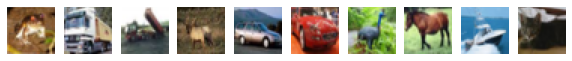

In [5]:
fig, ax = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
  ax[i].set_axis_off()
  ax[i].imshow(x_train[i])
plt.show()

In [160]:
tf.keras.backend.clear_session()

In [161]:
def get_model():
  model = Sequential([
                      Conv2D(32, kernel_size=(3,3), input_shape=(32,32,3),
                             activation='relu'),
                      Conv2D(16, kernel_size=(3,3), activation='relu'),
                      MaxPool2D(pool_size=(4,4)),
                      Flatten(),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])

  #model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #Save Model-Load Model is not working with just "accuracy". It has to be below
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
  return model

In [162]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        4624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 30,970
Trainable params: 30,970
Non-trainable params: 0
____________________________________________________

In [146]:
def print_test_accuracy(model, x_test, y_test):
  loss, acc = model.evaluate(x_test, y_test)
  print(f"Test Accuracy= {acc:0.3}")


In [147]:
#test accuracy on an untrained model
print_test_accuracy(model, x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 2.3143 - sparse_categorical_accuracy: 0.0970
Test Accuracy= 0.097


In [148]:
checkpoint_path = 'sample_data/model_checkpoint/checkpoint'
checkpoint = ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

history = model.fit(x_train, y_train, epochs=10, callbacks=[checkpoint], validation_split=0.10, verbose=False)


Epoch 00001: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00002: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00003: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00004: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00005: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00006: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00007: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00008: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00009: saving model to sample_data/model_checkpoint/checkpoint

Epoch 00010: saving model to sample_data/model_checkpoint/checkpoint


In [149]:
!ls -lh sample_data/model_checkpoint

total 376K
-rw-r--r-- 1 root root   77 Oct  7 04:32 checkpoint
-rw-r--r-- 1 root root 367K Oct  7 04:32 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct  7 04:32 checkpoint.index


In [150]:
#test accuracy on a trained model
print_test_accuracy(model, x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 1.1642 - sparse_categorical_accuracy: 0.5790
Test Accuracy= 0.579


In [151]:
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,1.911987,0.297111,1.701310,0.368
1,1.484535,0.470778,1.455586,0.467
2,1.364537,0.511667,1.528920,0.441
3,1.273108,0.543000,1.298824,0.516
4,1.203462,0.571556,1.286055,0.552


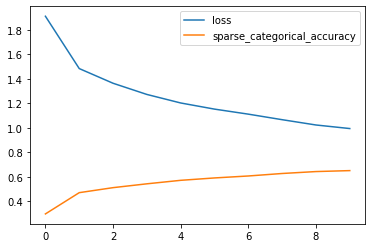

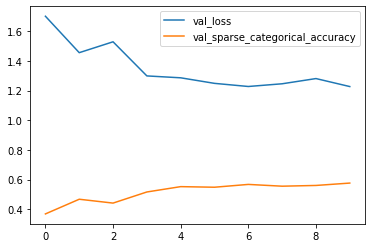

In [153]:
df[['loss', 'sparse_categorical_accuracy']].plot()
df[['val_loss', 'val_sparse_categorical_accuracy']].plot()

In [154]:
model = get_model()
model.load_weights(checkpoint_path)

In [155]:
print_test_accuracy(model, x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 1.1642 - sparse_categorical_accuracy: 0.5790
Test Accuracy= 0.579


In [156]:
!mkdir sample_data/model_checkpoint

mkdir: cannot create directory ‘sample_data/model_checkpoint’: File exists


In [157]:
#When saving in HDF5 format, the folder is not created. So create the folder with the above command and run the cell
#checkpoint_path1 = 'sample_data/model_checkpoint/checkpoint.h5'
#checkpoint_path1 = 'sample_data/model_checkpoint/checkpoint-{epoch}.h5'
checkpoint_path1 = 'sample_data/model_checkpoint/'
checkpoint1 = ModelCheckpoint(checkpoint_path1, save_weights_only=True, verbose=1)

model.fit(x_train, y_train, epochs=3, callbacks=[checkpoint1], batch_size=128)

Epoch 1/3
79/79 [==============================] - ETA: 0s - loss: 0.9319 - sparse_categorical_accuracy: 0.6735
Epoch 00001: saving model to sample_data/model_checkpoint/
79/79 [==============================] - 0s 6ms/step - loss: 0.9319 - sparse_categorical_accuracy: 0.6735
Epoch 2/3
76/79 [===========================>..] - ETA: 0s - loss: 0.9120 - sparse_categorical_accuracy: 0.6842
Epoch 00002: saving model to sample_data/model_checkpoint/
79/79 [==============================] - 0s 5ms/step - loss: 0.9128 - sparse_categorical_accuracy: 0.6839
Epoch 3/3
77/79 [============================>.] - ETA: 0s - loss: 0.9044 - sparse_categorical_accuracy: 0.6865
Epoch 00003: saving model to sample_data/model_checkpoint/
79/79 [==============================] - 0s 5ms/step - loss: 0.9041 - sparse_categorical_accuracy: 0.6864


In [158]:
!ls -lh sample_data/model_checkpoint

total 376K
-rw-r--r-- 1 root root   59 Oct  7 04:34 checkpoint
-rw-r--r-- 1 root root 367K Oct  7 04:32 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Oct  7 04:32 checkpoint.index


In [159]:
model.load_weights(checkpoint_path1)
print_test_accuracy(model, x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 1.1384 - sparse_categorical_accuracy: 0.6140
Test Accuracy= 0.614


## Save the whole model

In [163]:
model_path = 'sample_data/mymodel'
model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
79/79 [==============================] - 0s 6ms/step - loss: 2.0573 - sparse_categorical_accuracy: 0.2428
Epoch 2/3
79/79 [==============================] - 0s 5ms/step - loss: 1.6764 - sparse_categorical_accuracy: 0.3976
Epoch 3/3
79/79 [==============================] - 0s 5ms/step - loss: 1.5181 - sparse_categorical_accuracy: 0.4498


In [164]:
!ls -lh sample_data/mymodel

total 128K
drwxr-xr-x 2 root root 4.0K Oct  7 04:26 assets
-rw-r--r-- 1 root root 120K Oct  7 04:28 saved_model.pb
drwxr-xr-x 2 root root 4.0K Oct  7 04:28 variables


In [165]:
print_test_accuracy(model, x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 1.5702 - sparse_categorical_accuracy: 0.4710
Test Accuracy= 0.471


In [166]:
model.save(model_path)

INFO:tensorflow:Assets written to: sample_data/mymodel/assets


In [167]:
del model1

In [168]:
from tensorflow.keras.models import load_model

In [169]:
model1 = load_model(model_path)
print_test_accuracy(model1, x_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 1.5702 - sparse_categorical_accuracy: 0.4710
Test Accuracy= 0.471


In [171]:
model_path = 'sample_data/mymodel'
checkpoint_path = 'sample_data/model_checkpoint/'
checkpoint = ModelCheckpoint(checkpoint_path1, save_weights_only=True, verbose=1)
model.fit(x_train, y_train, epochs=3, callbacks=[checkpoint], batch_size=128)

Epoch 1/3
70/79 [=========================>....] - ETA: 0s - loss: 1.4391 - sparse_categorical_accuracy: 0.4809
Epoch 00001: saving model to sample_data/model_checkpoint/
79/79 [==============================] - 0s 6ms/step - loss: 1.4369 - sparse_categorical_accuracy: 0.4830
Epoch 2/3
71/79 [=========================>....] - ETA: 0s - loss: 1.3546 - sparse_categorical_accuracy: 0.5139
Epoch 00002: saving model to sample_data/model_checkpoint/
79/79 [==============================] - 0s 5ms/step - loss: 1.3518 - sparse_categorical_accuracy: 0.5153
Epoch 3/3
75/79 [===========================>..] - ETA: 0s - loss: 1.3252 - sparse_categorical_accuracy: 0.5263
Epoch 00003: saving model to sample_data/model_checkpoint/
79/79 [==============================] - 0s 5ms/step - loss: 1.3238 - sparse_categorical_accuracy: 0.5272


In [173]:
!ls -lh sample_data/mymodel/

total 128K
drwxr-xr-x 2 root root 4.0K Oct  7 04:26 assets
-rw-r--r-- 1 root root 120K Oct  7 04:34 saved_model.pb
drwxr-xr-x 2 root root 4.0K Oct  7 04:34 variables


In [174]:
del model1
model1 = load_model(model_path)
print_test_accuracy(model1, x_test, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 1.5702 - sparse_categorical_accuracy: 0.4710
Test Accuracy= 0.471


In [175]:
rm -r sample_data/model_checkpoint

In [176]:
!ls -lh sample_data/model_checkpoint

ls: cannot access 'sample_data/model_checkpoint': No such file or directory
